> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

<a id='intro'></a>
## Introduction

#### In this project, I'm going to analyse data to determine why certain people make appointment, but no-show 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● Encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [263]:
# Import statements for all of the packages and read data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [264]:
# Check number of records and columns
df.shape

(110527, 14)

In [265]:
# Check some basic statistics about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>I see negative one (-1) min Age, which could be a potential DQ issue becasue ages must be >0.
I also notice that max value of 4 in Handcap. I was expecting only 1 and 0. Let's check this one too

In [266]:
#Query to see non-realistic Ages in data
df[df['Age'] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


> There are 3540 records with 0 or <=0 ages. I plan to fix this issue later in this analysis

In [267]:
#Query to see various usique values in of each field
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

> ***Kaggle site expects only 1 or 0 (True or False) for this field***, but we notice 5 values (0-4)

In [268]:
#Lets check how may records have each of the 5 Handcap vlaues
df.groupby('Handcap')['Handcap'].count()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [269]:
#There are only 199 entries with values 2-4 values. I'll convert those to 1 to make it consistent
df.loc[(df.Handcap == 2),'Handcap']=1
df.loc[(df.Handcap == 3),'Handcap']=1
df.loc[(df.Handcap == 4),'Handcap']=1

In [270]:
#Lets check if all Handcap are 0 & 1
df.groupby('Handcap')['Handcap'].count()

Handcap
0    108286
1      2241
Name: Handcap, dtype: int64

In [271]:
# Lets check for Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


1. Nice. There are no Null values. So no action needed to handle NULLs
2. ScheduledDay & AppointmentDay are Strings but needs to be converted into Date

In [272]:
#I notice Convert ScheduledDay & AppointmentDay are strings, so lets convert these to Date
df['onlydate_ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['onlydate_AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

In [273]:
#I will add a new column as the difference between Sheduled and Appintment date so we can treat it as a independent variable
df['diff_days'] = (df['onlydate_AppointmentDay'] - df['onlydate_ScheduledDay']).dt.days
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,onlydate_ScheduledDay,onlydate_AppointmentDay,diff_days
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


In [274]:
#Lets check if any duplicate records exist
df.duplicated().sum()

0

Nice. No duplicate records exist

In [275]:
#Now, let's fix the Age too for just in case there is any corelation with no-show status with Age
#I will replace the <0 values with mean Age
Age_mean = df['Age'].mean()
df.loc[(df.Age <= 0),'Age']=Age_mean
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,onlydate_ScheduledDay,onlydate_AppointmentDay,diff_days
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


In [276]:
#Let's check if no <0 Ages
df[df['Age'] <= 0] 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,onlydate_ScheduledDay,onlydate_AppointmentDay,diff_days


In [277]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,onlydate_ScheduledDay,onlydate_AppointmentDay,diff_days
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


In [278]:
#Let's change Yes/No values in No-show column to be 1/0 for easier analysis
df.loc[(df['No-show'] == 'Yes'),'No-show']='1'
df.loc[(df['No-show']  == 'No'),'No-show']='0'

#Convert to numeric
df['No-show'] = pd.to_numeric(df['No-show'])

In [279]:
#Final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PatientId                110527 non-null  float64
 1   AppointmentID            110527 non-null  int64  
 2   Gender                   110527 non-null  object 
 3   ScheduledDay             110527 non-null  object 
 4   AppointmentDay           110527 non-null  object 
 5   Age                      110527 non-null  float64
 6   Neighbourhood            110527 non-null  object 
 7   Scholarship              110527 non-null  int64  
 8   Hipertension             110527 non-null  int64  
 9   Diabetes                 110527 non-null  int64  
 10  Alcoholism               110527 non-null  int64  
 11  Handcap                  110527 non-null  int64  
 12  SMS_received             110527 non-null  int64  
 13  No-show                  110527 non-null  int64  
 14  only

In [280]:
#Removing the unwanted columns
df.drop(['AppointmentID','ScheduledDay','AppointmentDay','onlydate_ScheduledDay','onlydate_AppointmentDay'], inplace=True, axis=1)

In [281]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PatientId      110527 non-null  float64
 1   Gender         110527 non-null  object 
 2   Age            110527 non-null  float64
 3   Neighbourhood  110527 non-null  object 
 4   Scholarship    110527 non-null  int64  
 5   Hipertension   110527 non-null  int64  
 6   Diabetes       110527 non-null  int64  
 7   Alcoholism     110527 non-null  int64  
 8   Handcap        110527 non-null  int64  
 9   SMS_received   110527 non-null  int64  
 10  No-show        110527 non-null  int64  
 11  diff_days      110527 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 10.1+ MB


,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,diff_days
0,2.987250e+13,F,62.0,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,F,56.0,JARDIM DA PENHA,0,1,1,0,0,0,0,0


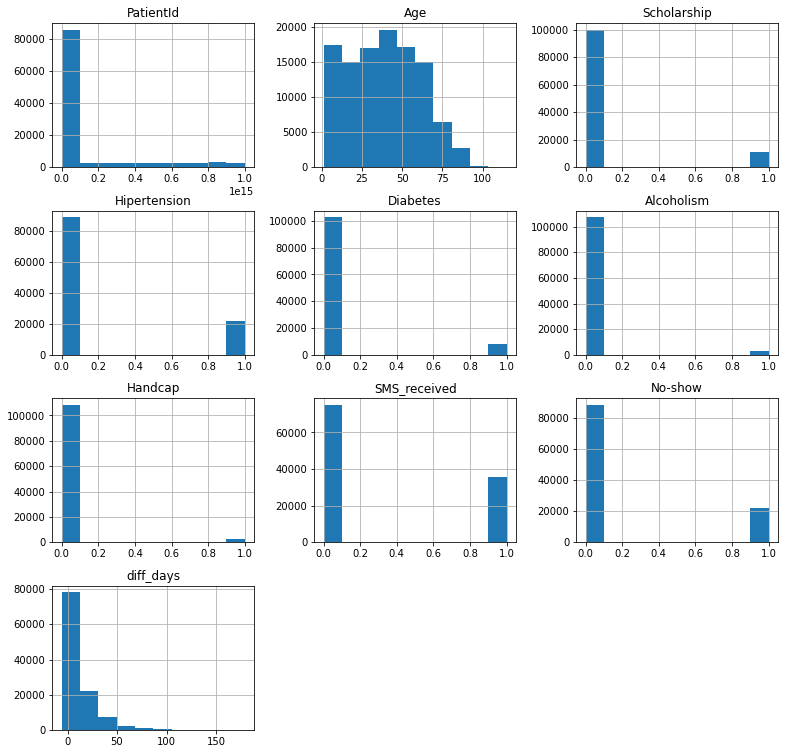

In [282]:
#Check data distribution
df.hist(figsize=(13,13));

In [283]:
#To make analysis easy, let's mask the rows with people with show and no-show
show = df['No-show'] == 0
no_show = df['No-show'] == 1

<a id='eda'></a>
## Exploratory Data Analysis

### Does Age has something to do with people not showing up for appointment?

In [284]:
df[show]['Age'].mean()

39.00986105668683

In [285]:
df[no_show]['Age'].mean()

35.37953271299324

We can see that mean Age of people who keep appointment is higher (39.0) than who miss it (35.4)
This means that younger people are slightly more possible to miss appointment than older

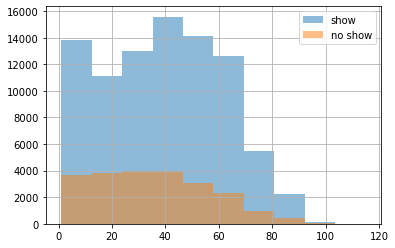

In [286]:
#Let's see the same in the distribution of Age
df[show]['Age'].hist(alpha = 0.5, label='show')
df[no_show]['Age'].hist(alpha = 0.5, label='no show')
plt.legend();

### Does Gender has something to do with people not showing up for appointment?

In [287]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.groupby('Gender')['No-show'].mean()

Gender
F    0.203146
M    0.199679
Name: No-show, dtype: float64

We can see that mean for both Male and Female is same
This means that Gender do not have impact on no-show

### Does neighbourhood has any coorelation with no-show?

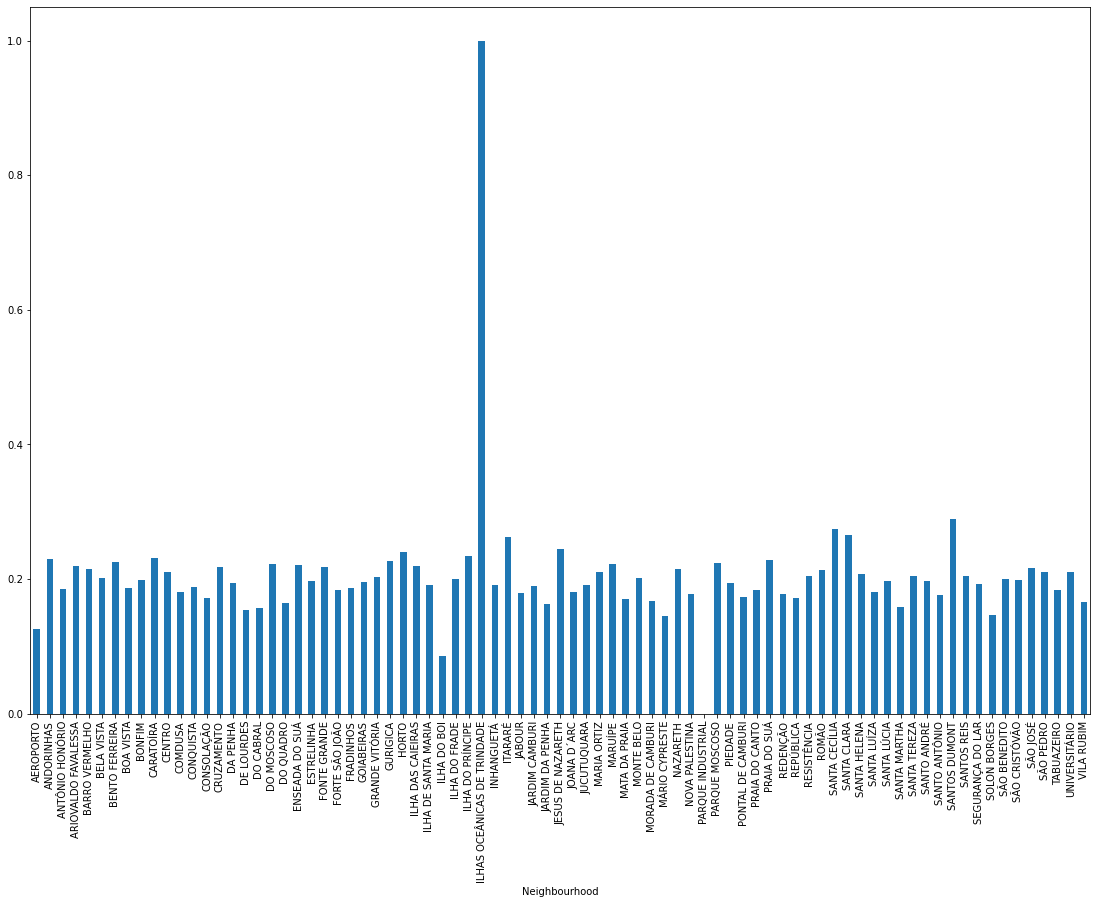

In [288]:
df.groupby('Neighbourhood')['No-show'].mean().plot(kind='bar', figsize=(19,13));

We notice that "ILHAS OCEANICAS DE TRINDAD" neighbourhood people are most likely to miss the appointment

### Does the difference between Scheduled Date and Appointment Date as impact on no-show?

In [289]:
df[show]['diff_days'].median()

2.0

In [290]:
df[no_show]['diff_days'].median()

11.0

There is a significant difference between the medians of days difference betweeen the Scheduled Date and Appointment Date for show and no-shows. This means that if the days difference is larger between Scheduled Date and Appointment Date, the person is more likely to no-show

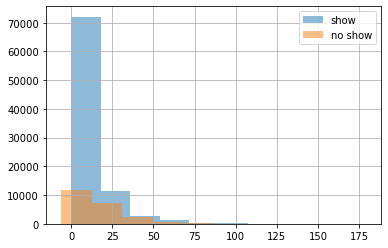

In [291]:
# Let's check the same via graph
df[show]['diff_days'].hist(alpha = 0.5, label='show')
df[no_show]['diff_days'].hist(alpha = 0.5, label='no show')
plt.legend();

### Does other independent variables (Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received) have impact on no-shows

In [292]:
# Checking SMS_received
df[show]['SMS_received'].mean()

0.2913341193542536

In [293]:
# Checking SMS_received
df[no_show]['SMS_received'].mean()

0.43837089475334917

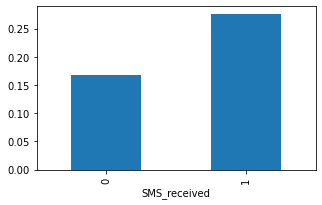

In [294]:
#Checking Graphically too
df.groupby('SMS_received')['No-show'].mean().plot(kind='bar', figsize=(5,3));

I see getting SMS increases the poossibility of no-show. This is contrary to what I was thinking

In [295]:
# Checking Hipertension
df[show]['Hipertension'].mean()

0.20439189189189189

In [296]:
# Checking Hipertension
df[no_show]['Hipertension'].mean()

0.16900398763385457

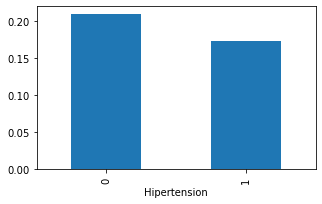

In [297]:
#Checking Graphically too
df.groupby('Hipertension')['No-show'].mean().plot(kind='bar', figsize=(5,3));

Let me check the other way round i.e. what's the mean of people's no-show for people having Hipertention

In [298]:
df[df['Hipertension'] == 0]['No-show'].mean()

0.20903680995424115

In [299]:
df[df['Hipertension'] == 1]['No-show'].mean()

0.17301958625751113

It means that there is slightly higher chance of people with Hipertension to show up for appointment then not showing up

In [300]:
# Checking Diabetes
df[show]['Diabetes'].mean()

0.0738368401959006

In [301]:
# Checking Diabetes
df[no_show]['Diabetes'].mean()

0.06407097092163627

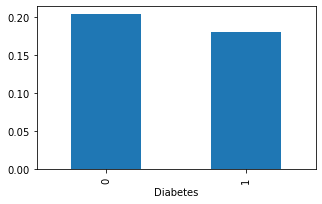

In [302]:
#Checking Graphically too
df.groupby('Diabetes')['No-show'].mean().plot(kind='bar', figsize=(5,3));

It means that there is slightly higher chance of people with Diabetes to show up for appointment then not showing up becasue mean value of No-show is lower for Diabetes people

In [303]:
# Checking Alcoholism
df[show]['Alcoholism'].mean()

0.030416742245601307

In [304]:
# Checking Alcoholism
df[no_show]['Alcoholism'].mean()

0.030332900219543886

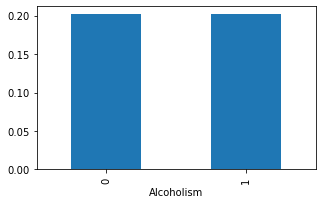

In [305]:
#Checking Graphically too
df.groupby('Alcoholism')['No-show'].mean().plot(kind='bar', figsize=(5,3));

Not much difference detected

In [306]:
# Checking Handcap
df[show]['Handcap'].mean()

0.020791764919281697

In [307]:
# Checking Handcap
df[no_show]['Handcap'].mean()

0.018235584031542632

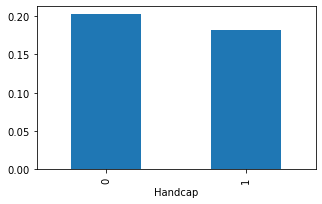

In [308]:
#Checking Graphically too
df.groupby('Handcap')['No-show'].mean().plot(kind='bar', figsize=(5,3));

It means that there is slightly higher chance of people with Handcap condition to show up for appointment then not showing up

In [309]:
# Lastly, checking Handcap
df[show]['Scholarship'].mean()

0.09390304734264465

In [310]:
df[no_show]['Scholarship'].mean()

0.11550696715802679

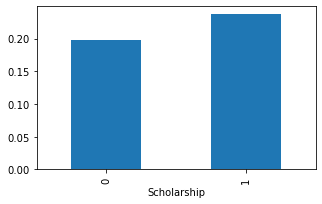

In [311]:
#Checking Graphically too
df.groupby('Scholarship')['No-show'].mean().plot(kind='bar', figsize=(5,3));

It means that there is slightly higher chance of people with Scholorship to no show

<a id='conclusions'></a>
## Conclusions

I noticed that:
* People with medical condition such as **Hipertension, Diabetes, Alcoholism and/or Handcap** have higher possibility to **show up for appointment**
* People from "ILHAS OCEANICAS DE TRINDAD" **neighbourhood** people are most likely to **miss the appointment**
* People who get **sms** message have higher posssibity to **miss the appoitment** (Surprise!!!)
* Yoounger people (lower **Age**) have higher possibility for **no show**
* People with **Sholorship** have higher possibility for **no show**
* If there is wide gap betweeen the day appointment is taken & appointtment day, the more chance of missing the appointment
* Gender has no influence on no-show